# Data Madness
## Group idk

### authors:
* Simon Garland
* PierrePaul Charbonnier
* Filip Straka

Department of Advanced Computing Sciences
Maastricht University
March 2024

Let's begin with extracting the data from the ZIP files (they'll grow tremendously)

In [71]:
import os.path

# NB: im doing it on a small fraction of the data now to prevent my laptop from blowing up ever so nicely

## imports ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

In [72]:
# define all possible files
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
years = ["21", "22", "23", "24"]
modes = ["standard", "rapid", "blitz"]

In [73]:
for month in months:
    for mode in modes:
        #for year in years:
        year = "24"
        path = '../data_zipped/'+mode+"_"+month+year+"frl_xml.zip"
        if os.path.exists(path):
            with zipfile.ZipFile(path, 'r') as zip_ref:
                zip_ref.extractall('../data_unzipped')

In [74]:
lst_std = []
lst_rapid = []
lst_blitz = []

In [75]:
def xml_to_list(months_, years_, mode_):
    lst = []
    for month_ in months_:
        for year_ in years_:
            path_ = '../data_unzipped/'+mode_+"_"+month_+year_+"frl_xml.xml"
            if os.path.exists(path_):
                df = pd.read_xml(path_)
                # making sure we dont add useless people
                df.dropna(subset=['rating','birthday','sex','name','country'])
                df.add_suffix(month_+year_)
                df.head(10)
                lst.append(df)
    return lst

In [76]:
lst_std_2024 = xml_to_list(months, ["24"], "standard")
print(lst_std_2024)

[          fideid                      name country sex title w_title o_title  \
0       10245154     A B M Jobair, Hossain     BAN   M  None    None    None   
1       25121731                A C J John     IND   M  None    None    None   
2       35077023            A Chakravarthy     IND   M  None    None    None   
3       10207538          A E M, Doshtagir     BAN   M  None    None    None   
4       10680810  A hamed Ashraf, Abdallah     EGY   M  None    None    None   
...          ...                       ...     ...  ..   ...     ...     ...   
440380  34190632            Zyubin, Sergey     RUS   M  None    None    None   
440381  55746969            Zyuganov, Igor     RUS   M  None    None    None   
440382  24232602             Zyuzev, Pavel     RUS   M  None    None    None   
440383   1189980            Zywert, Kacper     POL   M  None    None    None   
440384  21857814       Zyznowska, Marianna     POL   F  None    None    None   

       foa_title  rating  games   k  b

In [77]:
# not used yet

int_to_mon = {
    0: "jan",
    1: "feb",
    2: "mar",
    3: "apr",
    4: "may",
    5: "jun",
    6: "jul",
    7: "aug",
    8: "sep",
    9: "oct",
    10: "nov",
    11: "dec"
}

def lst_to_df(lst):
    for i in range(len(lst)):
        lst[i] = lst[i].add_suffix('_'+str(i))
        lst[i].set_index('fideid_'+str(i), inplace=True)
        
        
    combined_df = lst[0]
    for i in range(1, len(lst)):
        combined_df = combined_df.combine_first(lst[i])
        
    return combined_df

In [78]:
df_std_2024 = lst_to_df(lst_std_2024)

In [79]:
#print(df_std_2024)

           birthday_0  birthday_1  birthday_2 country_0 country_1 country_2  \
100013         1957.0      1957.0      1957.0       ARG       ARG       ARG   
100021         1947.0      1947.0      1947.0       ARG       ARG       ARG   
100048         1990.0      1990.0      1990.0       ARG       ARG       ARG   
100064         2000.0      2000.0      2000.0       ARG       ARG       ARG   
100072         1968.0      1968.0      1968.0       ARG       ARG       ARG   
...               ...         ...         ...       ...       ...       ...   
653099362      1971.0      1971.0      1971.0       FRA       FRA       FRA   
653099389      1974.0      1974.0      1974.0       FRA       FRA       FRA   
653099419         NaN      1983.0      1983.0       NaN       FRA       FRA   
653099486         NaN      1999.0      1999.0       NaN       FRA       FRA   
653099869         NaN      2007.0      2007.0       NaN       FRA       FRA   

          flag_0 flag_1 flag_2 foa_title_0  ... rat

(array([[1.1803e+04, 1.4349e+04, 1.5924e+04, 1.6556e+04, 1.7378e+04,
         1.7192e+04, 1.7685e+04, 1.7442e+04, 1.8283e+04, 1.8261e+04,
         1.8414e+04, 1.8823e+04, 1.8831e+04, 1.9177e+04, 1.8480e+04,
         1.8813e+04, 1.8252e+04, 1.7693e+04, 1.6636e+04, 1.6109e+04,
         1.5160e+04, 1.3686e+04, 1.3698e+04, 1.1848e+04, 1.0235e+04,
         8.0710e+03, 6.7760e+03, 4.8790e+03, 3.6490e+03, 2.2400e+03,
         1.6960e+03, 1.0020e+03, 5.6000e+02, 3.4700e+02, 2.0900e+02,
         1.2100e+02, 6.0000e+01, 2.9000e+01, 1.4000e+01, 4.0000e+00],
        [1.2108e+04, 1.4652e+04, 1.6308e+04, 1.6774e+04, 1.7725e+04,
         1.7553e+04, 1.8012e+04, 1.7731e+04, 1.8580e+04, 1.8642e+04,
         1.8712e+04, 1.9177e+04, 1.9209e+04, 1.9445e+04, 1.8818e+04,
         1.9180e+04, 1.8585e+04, 1.8114e+04, 1.6976e+04, 1.6369e+04,
         1.5271e+04, 1.3827e+04, 1.3760e+04, 1.1975e+04, 1.0256e+04,
         8.0580e+03, 6.7700e+03, 4.8990e+03, 3.6230e+03, 2.2570e+03,
         1.6950e+03, 9.8100e+02, 

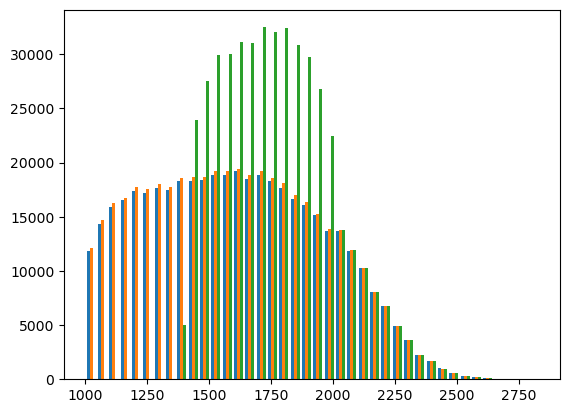

In [81]:
plt.hist([df_std_2024['rating_'+str(i)] for i in range(3)], bins=40)